1. Cargar librerías necesarias

In [1]:
##Las librerias que necesitare.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



2. importar fichero(data de autos)

In [50]:
data= pd.read_csv('/data.csv')
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [25]:
##Resumen de dataset(cantidad de filas y columnas)
data.shape

(11914, 16)

3. Comprobar los tipos de datos

In [26]:
##Comprobando los datos que contiene el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

4. Eliminar columnas irrelevantes

In [51]:
##Las siguientes columnas las eliminare ya que realizare un analices de los modelos de auto en relacion a su rendimiento en carretera y ciudad,
## tipo de transmision y cilindraje y sus precios.
df=data.drop(columns={'Engine Fuel Type', 'Engine HP','Number of Doors','Vehicle Size', 'Driven_Wheels',
                      'Popularity','Market Category','Vehicle Style' })
df.head()

,Make,Model,Year,Engine Cylinders,Transmission Type,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,6.0,MANUAL,26,19,46135
1,BMW,1 Series,2011,6.0,MANUAL,28,19,40650
2,BMW,1 Series,2011,6.0,MANUAL,28,20,36350
3,BMW,1 Series,2011,6.0,MANUAL,28,18,29450
4,BMW,1 Series,2011,6.0,MANUAL,28,18,34500


5. Cambiar nombre de las columnas (mejora legibilidad de los datos)

In [52]:
##Renombrando las columnas para tener mejor entendimiento.
rnome=df.rename(columns={'Engine Cylinders': 'Cylinders','Transmission Type': 'Transmission', 
 'highway MPG': 'H_MPG', 'city mpg':'C_MPG', 'MSRP': 'Price'})
rnome.head(5)

,Make,Model,Year,Cylinders,Transmission,H_MPG,C_MPG,Price
0,BMW,1 Series M,2011,6.0,MANUAL,26,19,46135
1,BMW,1 Series,2011,6.0,MANUAL,28,19,40650
2,BMW,1 Series,2011,6.0,MANUAL,28,20,36350
3,BMW,1 Series,2011,6.0,MANUAL,28,18,29450
4,BMW,1 Series,2011,6.0,MANUAL,28,18,34500


In [53]:
##Visualizando cuantas filas y columnas tenemos luego de la eliminacion de columnas
rnome.shape

(11914, 8)

##6. Soltar filas duplicadas

In [54]:
##Aqui podemos verificar cuantas filas duplicadas tiene el data
duplicate_rows_data = rnome[rnome.duplicated()]
print("Número de filas duplicadas: ", duplicate_rows_data.shape)

Número de filas duplicadas:  (1046, 8)


In [55]:
##Eliminar las filas que tengo duplicadas.
dataf=rnome.drop_duplicates()
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [56]:
##Contando la cantidad de filas que queda despues de eliminar las duplicadas
dataf.count()

Make            10868
Model           10868
Year            10868
Cylinders       10838
Transmission    10868
H_MPG           10868
C_MPG           10868
Price           10868
dtype: int64

##7. Descartar valores faltantes o nulos

In [37]:
##Verificando valores que son nulos o faltantes
dataf.isnull().sum()


Make             0
Model            0
Year             0
Cylinders       30
Transmission     0
H_MPG            0
C_MPG            0
Price            0
dtype: int64

In [38]:
##Eliminando los valores nulos o faltantes,
##Contando para verificar que se eliminen.
dataf = dataf.dropna()    
dataf.count()

Make            10838
Model           10838
Year            10838
Cylinders       10838
Transmission    10838
H_MPG           10838
C_MPG           10838
Price           10838
dtype: int64

8. Detección de valores atípicos

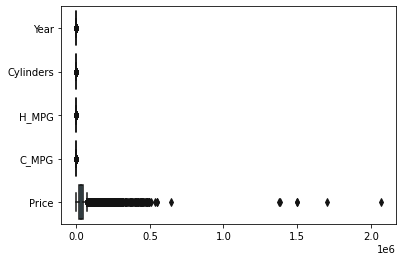

In [39]:
##Realizando una visualización en la grafica de caja, los datos atipicos en la data en general
sns.boxplot(data=dataf, orient='h', palette='ocean')

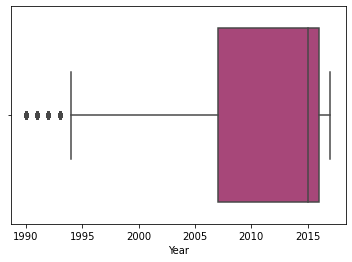

In [40]:
##Visualizando con grafica de caja los datos atipicos de la columna Year.
sns.boxplot(x=dataf.Year,data=dataf, orient='h', palette='magma');

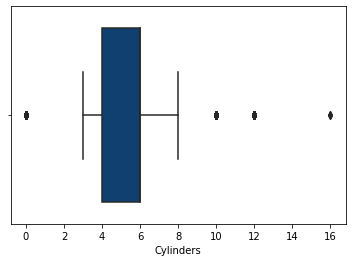

In [41]:
##Visualizando con el grafica de caja los datos atipicos en la columna de Cylinders.
sns.boxplot(x=dataf.Cylinders,data=dataf, orient='h', palette='ocean')

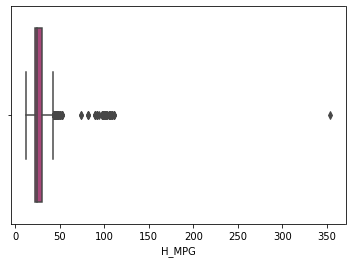

In [42]:
##Visualización con el grafica de caja los datos atipicos en la columna de H_MPG.
sns.boxplot(x=dataf.H_MPG,data=dataf, orient='h', palette='magma');

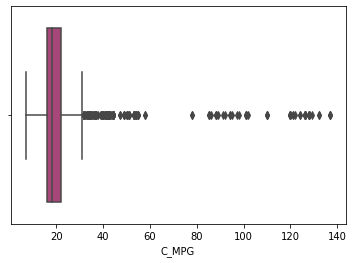

In [43]:
##Visualizando con el grafica de caja los datos atipicos en la columna C_MPG.
sns.boxplot(x=dataf.C_MPG,data=dataf, orient='h', palette='magma');

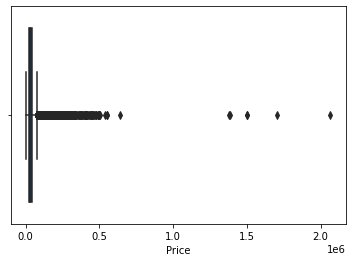

In [44]:
##Visualizando con el grafica de caja los datos atipicos en la columna de Price.
sns.boxplot(x=dataf.Price,data=dataf, orient='h', palette='ocean');

9. Graficar distintas características contra frecuencia (histograma)

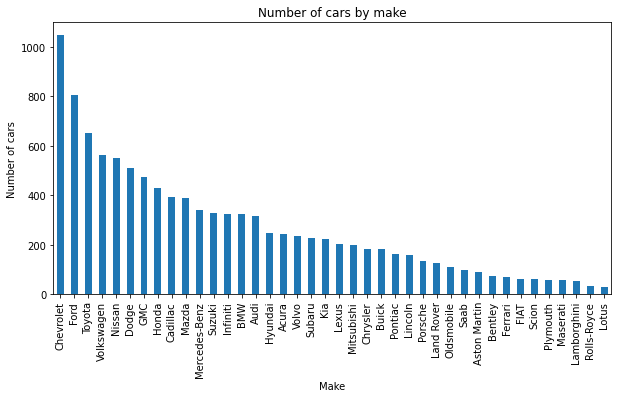

In [45]:
##Visualización de la cantidad de automóviles fabricados por empresas diferentes.
dataf.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

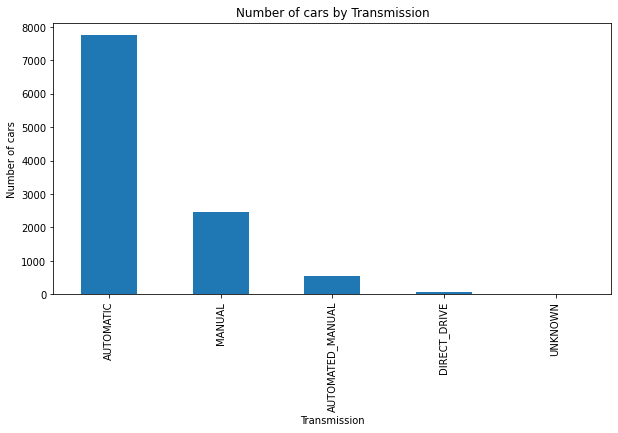

In [46]:
##Visualización de la cantidad de automóviles  fabricados dependiendo de su tipo de transmisión.
dataf.Transmission.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Transmission")
plt.ylabel('Number of cars')
plt.xlabel('Transmission');

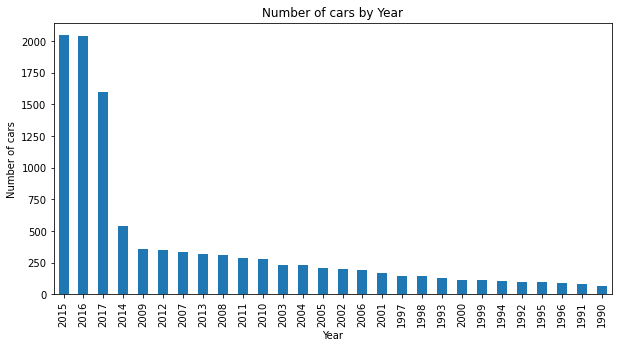

In [59]:
##Visualización de la cantidad de automóviles fabricados por año.
dataf.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Year")
plt.ylabel('Number of cars')
plt.xlabel('Year');

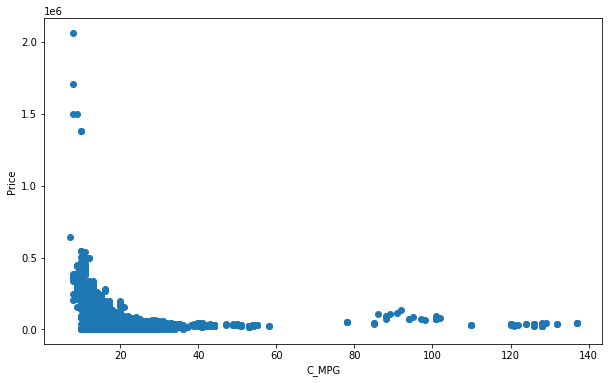

In [58]:
##La tendencia del rendimiento del auntomóvil en ciudad  con relacion al precio.
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dataf['C_MPG'], dataf['Price'])
ax.set_xlabel('C_MPG')
ax.set_ylabel('Price')
plt.show()

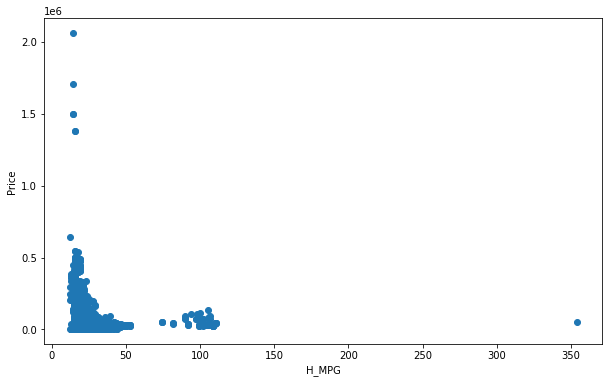

In [57]:
##La tendencia del rendimiento del auntomóvil en carretera  con relacion al precio.
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dataf['H_MPG'], dataf['Price'])
ax.set_xlabel('H_MPG')
ax.set_ylabel('Price')
plt.show()